
After having tried the previous models lets see the effect of n-grams embeddings (as discussed previosuly)
[Fasttext](https://fasttext.cc/docs/en/english-vectors.html)

In [1]:
# Lets mount the Google Drive and acccess the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
path = '/content/drive/MyDrive/IMDB/'  # path to the folder in google drive where data is saved
with open(path + "train.pkl", 'rb') as a, open(path + "test.pkl", 'rb') as b:
    d_train = pickle.load(a)   # loading training data
    d_test = pickle.load(b)   # loading test data 

In [3]:
# we wil be using the ktrain for loading pretrained models and embedding for next steps as this takes care of preprcoessing automatically behind the curtain.
# https://github.com/amaiya/ktrain

! pip install ktrain

     |████████████████████████████████| 25.3 MB 42.6 MB/s 
     |████████████████████████████████| 6.8 MB 49.7 MB/s 
     |████████████████████████████████| 981 kB 37.0 MB/s 
     |████████████████████████████████| 263 kB 39.8 MB/s 
     |████████████████████████████████| 2.8 MB 43.6 MB/s 
     |████████████████████████████████| 1.2 MB 46.0 MB/s 
     |████████████████████████████████| 468 kB 48.3 MB/s 
     |████████████████████████████████| 596 kB 44.1 MB/s 
     |████████████████████████████████| 61 kB 313 kB/s 
     |████████████████████████████████| 3.3 MB 33.2 MB/s 
     |████████████████████████████████| 895 kB 38.5 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=bbdebe84946462948ced446d208a60e1518f8661d2718e49cb953f398e2876f1
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=88f4b8137c86503

In [4]:
# for RADAM optimizer
! pip install tensorflow_addons


     |▎                               | 10 kB 24.5 MB/s eta 0:00:01
     |▋                               | 20 kB 30.0 MB/s eta 0:00:01
     |▉                               | 30 kB 13.4 MB/s eta 0:00:01
     |█▏                              | 40 kB 9.9 MB/s eta 0:00:01
     |█▌                              | 51 kB 5.1 MB/s eta 0:00:01
     |█▊                              | 61 kB 5.4 MB/s eta 0:00:01
     |██                              | 71 kB 5.9 MB/s eta 0:00:01
     |██▍                             | 81 kB 6.6 MB/s eta 0:00:01
     |██▋                             | 92 kB 6.9 MB/s eta 0:00:01
     |███                             | 102 kB 5.4 MB/s eta 0:00:01
     |███▎                            | 112 kB 5.4 MB/s eta 0:00:01
     |███▌                            | 122 kB 5.4 MB/s eta 0:00:01
     |███▉                            | 133 kB 5.4 MB/s eta 0:00:01
     |████▏                           | 143 kB 5.4 MB/s eta 0:00:01
     |████▍                           | 153 kB 5.4 MB

In [5]:
# some packages and library we will need
import tensorflow as tf
from tensorflow_addons.optimizers import RectifiedAdam
import os
import shutil
import matplotlib.pyplot as plt
import ktrain
from ktrain import text
import tensorflow as tf

In [6]:
# creating trianing and validation set from train set

(x_train, y_train), (x_val, y_val), preproc = ktrain.text.texts_from_df(train_df=d_train,
                                                                   text_column = 'text',
                                                                   label_columns = 'label',
                                                                   ngram_range=3,
                                                                  #  val_df = d_test,
                                                                   val_pct = 0.5,  # keeeping training batch low for faster runtime
                                                                   maxlen = 200,
                                                                   preprocess_mode = 'standard')

['not_label', 'label']
       not_label  label
6761         0.0    1.0
24254        0.0    1.0
12726        0.0    1.0
21750        1.0    0.0
1253         0.0    1.0
['not_label', 'label']
       not_label  label
24887        1.0    0.0
24727        1.0    0.0
18830        0.0    1.0
22855        1.0    0.0
13498        0.0    1.0
language: en
Word Counts: 66940
Nrows: 12500
12500 train sequences
train sequence lengths:
	mean : 227
	95percentile : 583
	99percentile : 887
Adding 3-gram features
max_features changed to 2671062 with addition of ngrams
Average train sequence length with ngrams: 678
train (w/ngrams) sequence lengths:
	mean : 679
	95percentile : 1746
	99percentile : 2658
x_train shape: (12500,200)
y_train shape: (12500, 2)
Is Multi-Label? False
12500 test sequences
test sequence lengths:
	mean : 224
	95percentile : 571
	99percentile : 873
Average test sequence length with ngrams: 497
test (w/ngrams) sequence lengths:
	mean : 497
	95percentile : 1249
	99percentile : 1849
x_t

In [6]:
# model = text.text_classifier('fasttext', trn, preproc=preproc)

model = text.text_classifier('fasttext',(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_val, y_val), 
                             batch_size= 16)

learner.lr_find()             # briefly simulate training to find good learning rate


Is Multi-Label? False
compiling word ID features...
maxlen is 200
done.
simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
782/782 [==============================] - 1270s 2s/step - loss: 0.9094 - accuracy: 0.5045
Epoch 2/1024
782/782 [==============================] - 1275s 2s/step - loss: 0.7564 - accuracy: 0.5162
Epoch 3/1024
782/782 [==============================] - 280s 357ms/step - loss: 636.6793 - accuracy: 0.4927


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


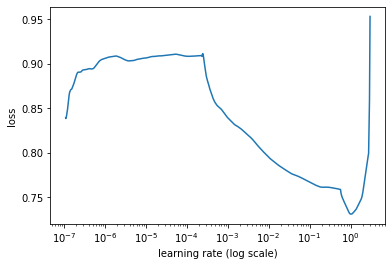

In [7]:
learner.lr_plot()

We can choose the learning rate in the the range of 0.005 to 0.01

In [10]:
model = text.text_classifier('fasttext',(x_train,y_train) , preproc=preproc)

# param for early stopping, number of epoch to wait before terminating the process, if no improvmenet seen for the monitored quantity
patience = 2

# loss and metrics for the models
loss = tf.keras.losses.BinaryCrossentropy()
metrics = tf.metrics.BinaryAccuracy()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy',   # as we are using binary accuracy which is same as accuracy for two category
                                                  patience=patience,
                                                  mode='max', restore_best_weights = False)

model.compile(optimizer=RectifiedAdam(learning_rate = 0.01, warmup_proportion = 0.2, beta_1 = 0.9, 
                                           total_steps= 3000, weight_decay = 0.05, min_lr= 0.001),loss= loss, metrics = metrics)

Is Multi-Label? False
compiling word ID features...
maxlen is 200
done.


In [12]:
# Finding epochs value ( Number fo epochs = 4). One can argue that we can keep the epoch value where val-accuracy is highest,
# but it is advisable to go beyond that and chose epoch value when training and valid begin to diverge.

learner = ktrain.get_learner(model, 
                             train_data=(x_train,y_train), 
                             val_data=(x_val,y_val), 
                             batch_size= 16)

# https://github.com/amaiya/ktrain/blob/a871779581eea37c5e0211a3f787af8c7f2e9522/ktrain/core.py#L833
# n_cycles* cycle_len = total number of epochs, in each cycle, the optimizer lr gradually decays down.

learner.fit(lr = 1e-2,n_cycles= 3, cycle_len = 2, callbacks= [early_stopping])

Epoch 1/6
782/782 [==============================] - 1746s 2s/step - loss: 0.6719 - binary_accuracy: 0.5786 - val_loss: 0.6061 - val_binary_accuracy: 0.7144
Epoch 2/6
782/782 [==============================] - 1724s 2s/step - loss: 0.4817 - binary_accuracy: 0.7726 - val_loss: 0.5130 - val_binary_accuracy: 0.7449
Epoch 3/6
782/782 [==============================] - 1711s 2s/step - loss: 0.3839 - binary_accuracy: 0.8323 - val_loss: 0.4788 - val_binary_accuracy: 0.7689
Epoch 4/6
782/782 [==============================] - 1714s 2s/step - loss: 0.2889 - binary_accuracy: 0.8860 - val_loss: 0.4761 - val_binary_accuracy: 0.7723
Epoch 5/6
197/782 [======>.......................] - ETA: 21:18 - loss: 0.2415 - binary_accuracy: 0.9055

KeyboardInterrupt: ignored

In [9]:
# creating finaldata set for maxlen = 200 
(x_train, y_train), (x_val, y_val), preproc = ktrain.text.texts_from_df(train_df=d_train,
                                                                   text_column = 'text',
                                                                   label_columns = 'label',
                                                                   ngram_range=2,
                                                                   val_df = d_test,
                                                                   maxlen = 200,
                                                                   preprocess_mode = 'standard')

model = text.text_classifier('fasttext',(x_train,y_train) , preproc=preproc)

loss = tf.keras.losses.BinaryCrossentropy()
metrics = tf.metrics.BinaryAccuracy()

model.compile(optimizer=RectifiedAdam(learning_rate = 0.005, warmup_proportion = 0.2, beta_1 = 0.9, 
                                           total_steps= 3000, weight_decay = 0.1, min_lr= 0.001),loss= loss, metrics = metrics)

['not_label', 'label']
   not_label  label
0        1.0    0.0
1        1.0    0.0
2        1.0    0.0
3        0.0    1.0
4        0.0    1.0
['not_label', 'label']
   not_label  label
0        0.0    1.0
1        0.0    1.0
2        1.0    0.0
3        1.0    0.0
4        0.0    1.0
language: en
Word Counts: 93788
Nrows: 25000
25000 train sequences
train sequence lengths:
	mean : 226
	95percentile : 578
	99percentile : 881
Adding 2-gram features
max_features changed to 1234298 with addition of ngrams
Average train sequence length with ngrams: 451
train (w/ngrams) sequence lengths:
	mean : 451
	95percentile : 1155
	99percentile : 1761
x_train shape: (25000,200)
y_train shape: (25000, 2)
Is Multi-Label? False
25000 test sequences
test sequence lengths:
	mean : 220
	95percentile : 556
	99percentile : 860
Average test sequence length with ngrams: 405
test (w/ngrams) sequence lengths:
	mean : 405
	95percentile : 1017
	99percentile : 1571
x_test shape: (25000,200)
y_test shape: (25000, 2)


In [10]:
learner = ktrain.get_learner(model, 
                             train_data=(x_train,y_train), 
                             batch_size= 16)
learner.fit_onecycle(lr = 5e-3,epochs = 5)



begin training using onecycle policy with max lr of 0.005...
Epoch 1/5
1563/1563 [==============================] - 1762s 1s/step - loss: 0.7512 - binary_accuracy: 0.5352
Epoch 2/5
1563/1563 [==============================] - 1763s 1s/step - loss: 0.5879 - binary_accuracy: 0.6813
Epoch 3/5
1563/1563 [==============================] - 1755s 1s/step - loss: 0.4725 - binary_accuracy: 0.7738
Epoch 4/5
1563/1563 [==============================] - 1763s 1s/step - loss: 0.3861 - binary_accuracy: 0.8280
Epoch 5/5
1563/1563 [==============================] - 1766s 1s/step - loss: 0.3309 - binary_accuracy: 0.8580


In [11]:
# increasing one more epoch
learner.fit_onecycle(lr = 5e-3,epochs = 1)



begin training using onecycle policy with max lr of 0.005...
1563/1563 [==============================] - 1771s 1s/step - loss: 0.2912 - binary_accuracy: 0.8773


In [15]:
learner.fit_onecycle(lr = 1e-3,epochs = 1)
# increasing one more epoch with max lr of 0.001




begin training using onecycle policy with max lr of 0.001...
1563/1563 [==============================] - 1762s 1s/step - loss: 0.2582 - binary_accuracy: 0.8963


In [16]:

print("Evaluating on test set...{}".format("FASTtext"))
(test_loss, test_accuracy) = learner.model.evaluate(x_val, y_val)
print("loss={:.4f}, accuracy: {:.4f}%".format(test_loss,test_accuracy * 100))

Evaluating on test set...FASTtext
782/782 [==============================] - 3s 3ms/step - loss: 0.3370 - binary_accuracy: 0.8494
loss=0.3370, accuracy: 84.9360%


Though we gave away glove in trade off with n-grams approach, but there doesnt seem to be any improvement, in hindsight it seems to better include the n-grams in pre-trianed embeddings. However as we are not able to break the mark of 90% accuray lets turn to state-of-the art models ( Transformers)

Note: Learning rate plot seems to suggest higher learning rate which cannot be right values, therefore fine tuning the leanring rate can substantially improve the measured metric.